This Notebook is a basic Random number and probability notebook, as a reference for basic probability calculations
<br> Links / sources: 
<br> 1) http://www.python-course.eu/python_numpy_probability.php

In [1]:
import random
[ random.randint(1, 6) for _ in range(10) ]

[3, 1, 5, 6, 4, 6, 5, 5, 2, 2]

In [2]:
import random
outcome = random.randint(1,6)
print(outcome)

1


In [3]:
import numpy as np
outcome = np.random.randint(1, 7, size=10)
print(outcome)

[3 3 5 2 6 1 5 3 3 2]


In [4]:
print(np.random.randint(1, 7))
print(np.random.randint(1, 7, size=1))
print(np.random.randint(1, 7, size=10))
print(np.random.randint(1, 7, size=(10,))) # the same as the previous one
print(np.random.randint(1, 7, size=(5, 4)))

1
[1]
[1 4 3 1 5 6 5 1 1 3]
[4 3 1 1 2 4 6 1 4 2]
[[5 6 5 2]
 [6 4 6 1]
 [1 2 3 5]
 [6 5 2 3]
 [5 3 1 6]]


In [5]:
from random import choice
professions = ["scientist", "philosopher", "engineer", "priest"]
print(choice("abcdefghij"))
print(choice(professions))
print(choice(("apples", "bananas", "cherries")))

a
philosopher
cherries


In [10]:
def find_interval(x, partition):
    """ find_interval -> i
        partition is a sequence of numerical values
        x is a numerical value
        The return value "i" will be the index for which applies
        partition[i] < x < partition[i+1], if such an index exists.
        -1 otherwise
    """
    
    for i in range(0, len(partition)):
        if x < partition[i]:
            return i-1
    return -1

I = [0, 3, 5, 7.8, 9, 12, 13.8, 16]
for x in [-1.3, 0, 0.1, 3.2, 5, 6.2, 7.9, 10.8, 13.9, 15, 16, 16.5]:
    print(find_interval(x, I))

-1
0
0
1
2
2
3
4
6
6
-1
-1


In [11]:
weights = [0.2, 0.5, 0.3]
cum_weights = [0] + list(np.cumsum(weights))
print(cum_weights)

[0, 0.20000000000000001, 0.69999999999999996, 1.0]


In [4]:
def weighted_choice(sequence, weights):
    """ 
    weighted_choice selects a random element of 
    the sequence according to the list of weights
    """
    x = np.random.random()
    cum_weights = [0] + list(np.cumsum(weights))
    index = find_interval(x, cum_weights)
    return sequence[index]

In [28]:
from collections import Counter

faces_of_die = [1, 2, 3, 4, 5, 6]
die_weights = [float(1./12.), float(1./6.), float(1./6.), float(1./6.), float(1./6.), float(3./12.)]
print(die_weights)
cum_weights = [0] + list(np.cumsum(die_weights))
print(cum_weights)

a = weighted_choice(faces_of_die, die_weights)
print(a)

outcomes = []
n = 100
for _ in range(n):
    a = weighted_choice(faces_of_die, die_weights)
    outcomes.append(a)
    #print(a )
    c = Counter(outcomes)
    #print(c)

for key in c:
    c[key] = c[key] / float(n)
    
print(sorted(c.values()))


[0.08333333333333333, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.25]
[0, 0.083333333333333329, 0.25, 0.41666666666666663, 0.58333333333333326, 0.74999999999999989, 0.99999999999999989]
6
[0.09, 0.14, 0.15, 0.17, 0.18, 0.27]


In [7]:
def find_interval(x, 
                  partition, 
                  endpoints=True):
    """ find_interval -> i
        If endpoints is True, "i" will be the index for which applies
        partition[i] < x < partition[i+1], if such an index exists.
        -1 otherwise
        
        If endpoints is False, "i" will be the smallest index 
        for which applies x < partition[i]. If no such index exists 
        "i" will be set to len(partition)
    """
    for i in range(0, len(partition)):
        if x < partition[i]:
            return i-1 if endpoints else i
    return -1 if endpoints else len(partition)



I = [0, 3, 5, 7.8, 9, 12, 13.8, 16]
print("Endpoints are included:")
for x in [-1.3, 0, 0.1, 3.2, 5, 6.2, 7.9, 10.8, 13.9, 15, 16, 16.5]:
    print(find_interval(x, I))
print("\nEndpoints are not included:")
for x in [-1.3, 0, 0.1, 3.2, 5, 6.2, 7.9, 10.8, 13.9, 15, 16, 16.5]:
    print(find_interval(x, I, endpoints=False))

Endpoints are included:
-1
0
0
1
2
2
3
4
6
6
-1
-1

Endpoints are not included:
0
1
1
2
3
3
4
5
7
7
8
8


In [30]:
x = np.random.random_sample((3, 4))
print(x)

[[ 0.80667812  0.71847484  0.05225326  0.97078273]
 [ 0.75725888  0.37951307  0.47829468  0.05099419]
 [ 0.36242983  0.55804681  0.03015922  0.3382892 ]]


In [31]:
x = np.random.random_sample(7)
print(x)
y = np.random.random_sample((7,))
print(y)

[ 0.9197109   0.70347693  0.44092007  0.57915646  0.83484464  0.5061981
  0.52446929]
[ 0.22058113  0.53250478  0.13092539  0.64647881  0.28762194  0.3009887
  0.9888178 ]


In [32]:
a = -3.4
b = 5.9
A = (b - a) * np.random.random_sample((3, 4)) + a
print(A)

[[ 4.81114616  2.21416389  1.32257958 -0.54437576]
 [-2.70473544  3.91273048  2.85601878  4.19561377]
 [ 2.1089051  -2.17281901 -1.68792872  3.14933103]]


In [33]:
print(random.sample(range(1, 50), 6))

[34, 29, 26, 9, 10, 16]


In [11]:
def weighted_sample_alternative(population, weights, k):
    """ 
    Alternative way to previous implementation.
        
    This function draws a random sample of length k 
    from the sequence 'population' according to the 
    list of weights
    """
    sample = set()
    population = list(population)
    weights = list(weights)
    while len(sample) < k:
        choice = weighted_choice(population, weights)
        if choice not in sample:
            sample.add(choice)
    return list(sample)

In [ ]:
balls = ["red", "green", "blue", "yellow", "black", "white", "pink", "orange"]
weights = [ 1/24, 1/6, 1/6, 1/12, 1/12, 1/24, 1/8, 7/24]
for i in range(10):
    print(weighted_sample_alternative(balls, weights, 3))

In [2]:
from collections import Counter
import numpy as np
import random
def weighted_sample(population, weights, k):
    """ 
    This function draws a random sample of length k 
    from the sequence 'population' according to the 
    list of weights
    """
    sample = set()
    population = list(population)
    weights = list(weights)
    while len(sample) < k:
        choice = weighted_choice(population, weights)
        sample.add(choice)
        index = population.index(choice)
        weights.pop(index)
        population.remove(choice)
        weights = [ x / sum(weights) for x in weights]
    return list(sample)

In [9]:
balls = ["red", "green", "blue", "yellow", "black", "white", "pink", "orange"]
weights = [ 1./24., 1./6., 1./6., 1./12., 1./12., 1./24., 1./8., 7./24.]
for i in range(10):
    print(weighted_sample(balls, weights, 3))

['blue', 'black', 'yellow']
['blue', 'white', 'green']
['blue', 'pink', 'green']
['orange', 'pink', 'yellow']
['orange', 'pink', 'green']
['orange', 'blue', 'red']
['orange', 'white', 'yellow']
['pink', 'blue', 'black']
['pink', 'green', 'yellow']
['orange', 'red', 'yellow']


In [14]:
n = 100000
orange_counter = 0
orange_counter_alternative = 0
for i in range(n):
    if "orange" in weighted_sample(balls, weights, 3):
        orange_counter += 1
    if "orange" in weighted_sample_alternative(balls, weights, 3):
        orange_counter_alternative += 1 
        
m = float(n)
print(orange_counter / m)
print(orange_counter_alternative / m)

0.71241
0.712


In [15]:
import random
def cartesian_choice(*iterables):
    """
    A list with random choices from each iterable of iterables 
    is being created in respective order.
    
    The result list can be seen as an element of the 
    Cartesian product of the iterables 
    """
    res = []
    for population in iterables:
        res.append(random.choice(population))
    return res
cartesian_choice(["The", "A"],
                 ["red", "green", "blue", "yellow", "grey"], 
                 ["car", "house", "fish", "light"],
                 ["smells", "dreams", "blinks"])

['A', 'green', 'light', 'blinks']

In [16]:
import random
def weighted_cartesian_choice(*iterables):
    """
    A list with weighted random choices from each iterable of iterables 
    is being created in respective order
    """
    res = []
    for population, weight in iterables:
        lst = weighted_choice(population, weight)
        res.append(lst)
    return res
determiners = (["The", "A", "Each", "Every", "No"], 
               [0.3, 0.3, 0.1, 0.1, 0.2])
colours = (["red", "green", "blue", "yellow", "grey"], 
           [0.1, 0.3, 0.3, 0.2, 0.2])
nouns = (["water", "elephant", "fish", "light", "programming language"], 
         [0.3, 0.2, 0.1, 0.1, 0.3])
nouns2 = (["of happiness", "of chocolate", "of wisdom", "of challenges", "of air"], 
         [0.5, 0.2, 0.1, 0.1, 0.1])

print("It may or may not be true:")
for i in range(10):
    res = weighted_cartesian_choice(determiners,
                                    colours,
                                    nouns,
                                    verb_phrases,
                                    nouns2)
    print(" ".join(res) + ".")

It may or may not be true:
The green light dreams of chocolate.
A green light thinks of happiness.
Each yellow water dreams of challenges.
No green fish smells of air.
The blue water thinks of happiness.
The yellow water thinks of chocolate.
The blue water thinks of happiness.
A red water thinks of challenges.
Every red elephant dreams of happiness.
A yellow programming language smells of chocolate.


In [21]:
verb_phrases = (["smells", "dreams", "thinks", "is made of"],[0.4, 0.3, 0.2, 0.1])
sentences = []
for i in range(10000):
    res = weighted_cartesian_choice(determiners,
                                    colours,
                                    nouns,
                                    verb_phrases,
                                    nouns2)
    sentences.append(" ".join(res) + ".")
words = ["smells", "dreams", "thinks", "is made of"]
from collections import Counter
c = Counter()
for sentence in sentences:
    for word in words:
        if word in sentence:
            c[word] += 1
  
wsum = sum(c.values())
for key in c:
    print(key, c[key] / float(wsum))

('is made of', 0.0972)
('smells', 0.4037)
('dreams', 0.3002)
('thinks', 0.1989)


In [22]:
help(random.seed)

Help on method seed in module random:

seed(self, a=None) method of random.Random instance
    Initialize internal state from hashable object.
    
    None or no argument seeds from current time or from an operating
    system specific randomness source if available.
    
    If a is not None or an int or long, hash(a) is used instead.



In [24]:
random.seed(42)
for _ in range(10):
    print(random.randint(1, 10))
    
print("\nLet's create the same random numbers again:")
random.seed(42)
for _ in range(10):
    print(random.randint(1, 10))

7
1
3
3
8
7
9
1
5
1

Let's create the same random numbers again:
7
1
3
3
8
7
9
1
5
1


In [25]:
from random import gauss
n = 1000
values = []
frequencies = {}
while len(values) < n:
    value = gauss(180, 30)
    if 130 < value < 230:
        frequencies[int(value)] = frequencies.get(int(value), 0) + 1
        values.append(value)
        
print(values[:10])

[186.96893210720162, 214.90676059797428, 199.69909520396007, 183.31521532331496, 157.85035192965537, 149.56012897536849, 187.39026585633607, 219.33242481612143, 181.24970591710152, 176.81030118687647]


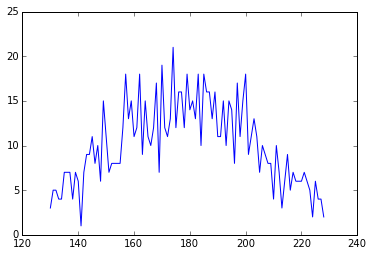

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
freq = list(frequencies.items())
freq.sort()
plt.plot(*list(zip(*freq)))

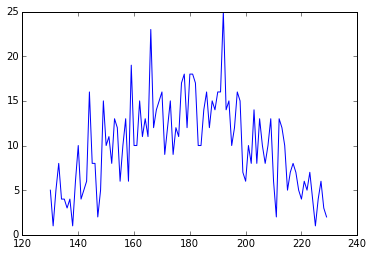

In [27]:
from random import normalvariate
n = 1000
values = []
frequencies = {}
while len(values) < n:
    value = normalvariate(180, 30)
    if 130 < value < 230:
        frequencies[int(value)] = frequencies.get(int(value), 0) + 1
        values.append(value)
freq = list(frequencies.items())
freq.sort()
plt.plot(*list(zip(*freq)))

In [28]:
def random_ones_and_zeros(p):
    """ p: probability 0 <= p <= 1
        returns a 1 with the probability p
    """
    x = random.random()
    if x < p:
        return 1
    else:
        return 0

In [29]:
n = 1000000
sum(random_ones_and_zeros(0.8) for i in range(n)) / float(n)

0.800607

In [30]:
def random_ones_and_zeros2(p):
    while True:
        x = random.random()
        yield 1 if x < p else 0
        
def firstn(generator, n):
    for i in range(n):
        yield next(generator)

In [32]:
n = 1000000
sum(x for x in firstn(random_ones_and_zeros2(0.8), n)) / float(n)

0.799764

In [33]:
sales = np.array([1245.89, 2220.00, 1635.77, 1936.25, 1002.03, 2099.13,  723.99, 990.37, 541.44, 1765.00, 1802.84, 1999.00])

In [34]:
min_percent = 0.98  # corresponds to -1.5 %
max_percent = 1.06   # 6 %
growthrates = (max_percent - min_percent) * np.random.random_sample(12) + min_percent
print(growthrates)

[ 1.04604086  1.01078583  1.02472685  1.02965328  0.98971502  1.01929697
  0.98883695  0.9867588   1.0592897   1.04736665  1.01160228  0.99764425]


In [35]:
sales * growthrates

array([ 1303.25184745,  2243.94454587,  1676.21744695,  1993.66616968,
         991.72413858,  2139.63685567,   715.90806543,   977.25631451,
         573.54181462,  1848.60214363,  1823.75705312,  1994.29086261])

In [36]:
fh = open("sales_figures.csv", "w")
fh.write("Year, Frankfurt, Munich, Berlin, Zurich, Hamburg, London, Toronto, Strasbourg, Luxembourg, Amsterdam, Rotterdam, The Hague\n")
sales = np.array([1245.89, 2220.00, 1635.77, 1936.25, 1002.03, 2099.13,  723.99, 990.37, 541.44, 1765.00, 1802.84, 1999.00])
for year in range(1997, 2016):
    line = str(year) + ", " + ", ".join(map(str, sales))
    fh.write(line + "\n")
    if year % 4 == 0:
         min_percent = 0.98  # corresponds to -1.5 %
         max_percent = 1.06   # 6 %
         growthrates = (max_percent - min_percent) * np.random.random_sample(12) + min_percent
         #growthrates = 1 + (np.random.rand(12) * max_percent - negative_max) / 100
    sales = np.around(sales * growthrates, 2)
fh.close()

In [38]:
from random import randint
outcomes = [ randint(1, 6) for _ in range(10000)]
even_pips = [ x for x in outcomes if x % 2 == 0]
greater_two = [ x for x in outcomes if x > 2]
combined = [ x for x in outcomes if x % 2 == 0 and x > 2]
print(len(even_pips) / float(len(outcomes)))
print(len(greater_two) / float(len(outcomes)))
print(len(combined) / float(len(outcomes)))

0.5058
0.6682
0.3373
